In [3]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [4]:
df=pd.read_csv('Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


The Dataset is about Heart disease prediction.
This datset is taken from uci repository.there are total 1025 records and 14 features. 
It is commonly used to develop predictive models for detecting the presence or absence of heart disease in individuals based -     on various medical and clinical attributes.
The target variable, "target," serves as the binary classification label, where 0 represents the absence of heart disease, and     represents the presence of heart disease.

#### features are :-
age: Age of the patient (numeric)

sex: Gender of the patient (0 for female, 1 for male)

cp: Chest pain type experienced by the patient (0, 1, 2, 3 - categorical)

trestbps: Resting blood pressure (in mm Hg - numeric)

chol: Serum cholesterol level (in mg/dl - numeric)

fbs: Fasting blood sugar > 120 mg/dl (0 for false, 1 for true - categorical)

restecg: Resting electrocardiographic results (0, 1, 2 - categorical)

thalach: Maximum heart rate achieved (numeric)

exang: Exercise induced angina (0 for no, 1 for yes - categorical)

oldpeak: ST depression induced by exercise relative to rest (numeric)

slope: Slope of the peak exercise ST segment (0, 1, 2 - categorical)

ca: Number of major vessels colored by fluoroscopy (0 to 3 - numeric)

thal: Thalassemia (0, 1, 2, 3 - categorical)

In [5]:
df.shape                                            # [rows * columns >= 10000]
                                                    # [1025 * 14 = 14350]                                

(1025, 14)

rows * columns >= 10000

1025 * 14 = 14350

In [6]:
info=pd.DataFrame(df.isnull().sum(),columns=['isnull'])
info.insert(1,'ISNA',df.isna().sum(),True)
info.insert(2,'Duplicated',df.duplicated(),True)
info.insert(3,'UNIQUE',df.nunique(),True)
info.insert(4,'MIN',df.min(),True)
info.insert(5,'MAX',df.max(),True)
info.T

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
isnull,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ISNA,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Duplicated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UNIQUE,41,2,4,49,152,2,3,91,2,40,3,5,4,2
MIN,29.0,0.0,0.0,94.0,126.0,0.0,0.0,71.0,0.0,0.0,0.0,0.0,0.0,0.0
MAX,77.0,1.0,3.0,200.0,564.0,1.0,2.0,202.0,1.0,6.2,2.0,4.0,3.0,1.0


No  null values and duplicate values are observed.

#### EDA

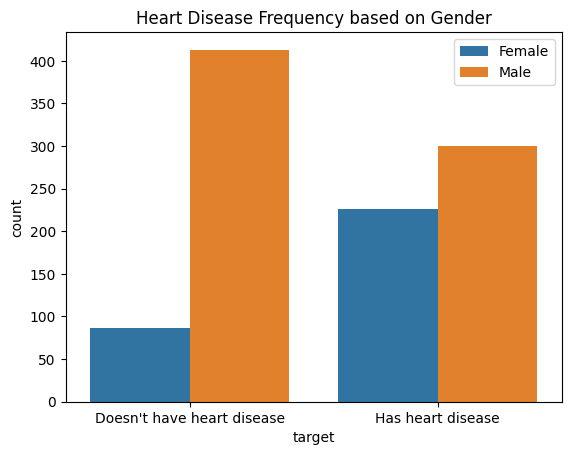

In [7]:

fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency based on Gender");

observation:- In the given dataset, there is a higher prevalence of heart disease among males compared to females.

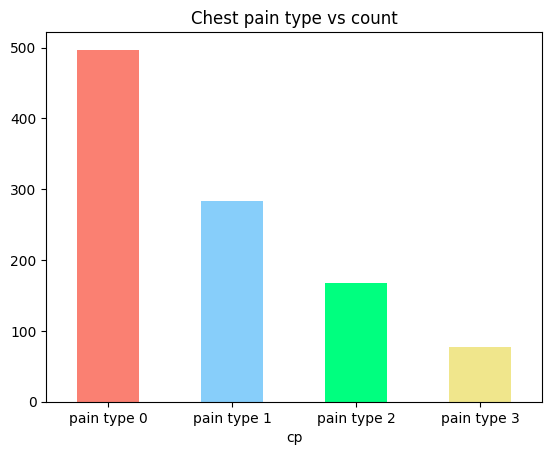

In [8]:
#plotting a bar chart
fig = df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

pain type 0-Typical angina

pain type 1-Atypical angina

pain type 2-Non-anginal pain

pain type 3-Asymptomatic

observation:- pain type 0 (Typical angina) is the most frequent type of chest pain occured.
              

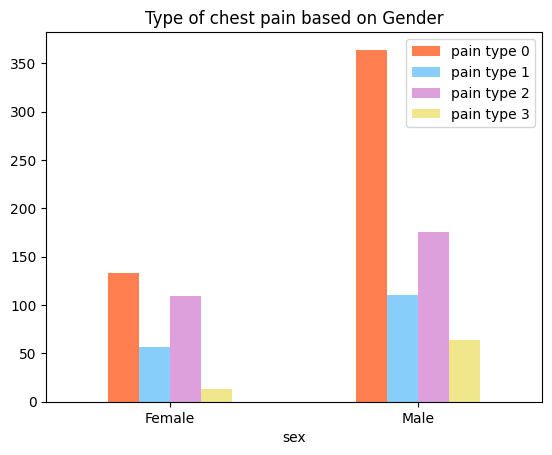

In [9]:

fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain based on Gender')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

observation-Male has relatively high number of chest pain of specific type-0 (typical angina)

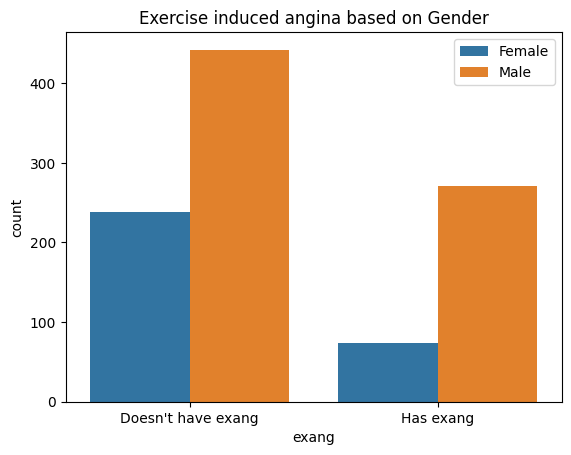

In [10]:
fig = sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina based on Gender')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

Exercise induced angina:A type of chest pain or discomfort that occurs during physical activity or exercise Exercise-induced

observation-male has higher number of count for exang due to physical workout compare to females

#### Data preprocessing

In [11]:
 def diagnostic_plots(df, variable,target):
    # The function takes a dataframe (df) and
    # the variable of interest as arguments.

    # Define figure size.
    plt.figure(figsize=(20, 7))

    # histogram
    plt.subplot(1, 4, 1)
    sns.histplot(df[variable], kde = True,color='r')
    plt.title('Histogram')


    # scatterplot
    plt.subplot(1, 4, 2)
    plt.scatter(df[variable],df[target],color = 'g')
    plt.title('Scatterplot')
    
     # boxplot
    plt.subplot(1, 4, 3)
    sns.boxplot(y=df[variable],color = 'b')
    plt.title('Boxplot')
    
    # barplot
    plt.subplot(1, 4, 4)
    sns.barplot(x = target, y = variable, data = df)   
    plt.title('Barplot')
    
    
    plt.show()

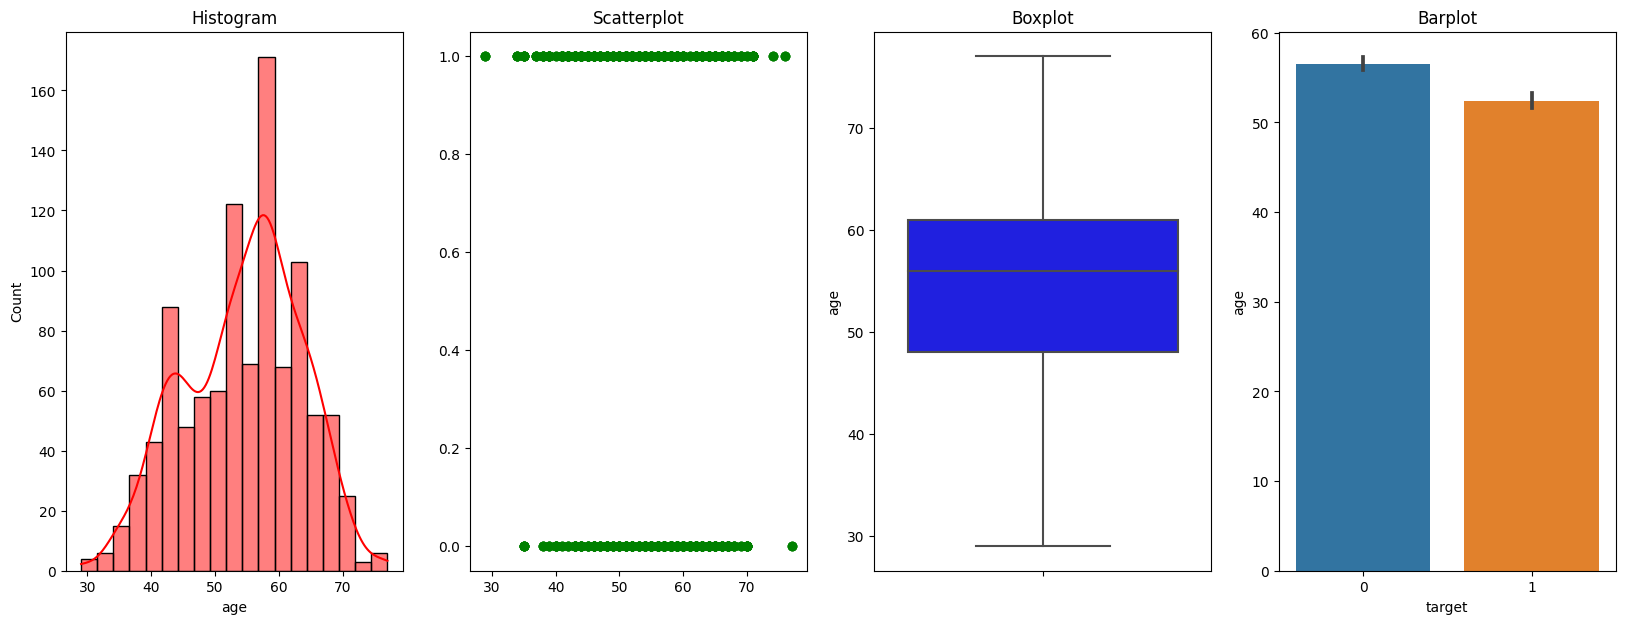

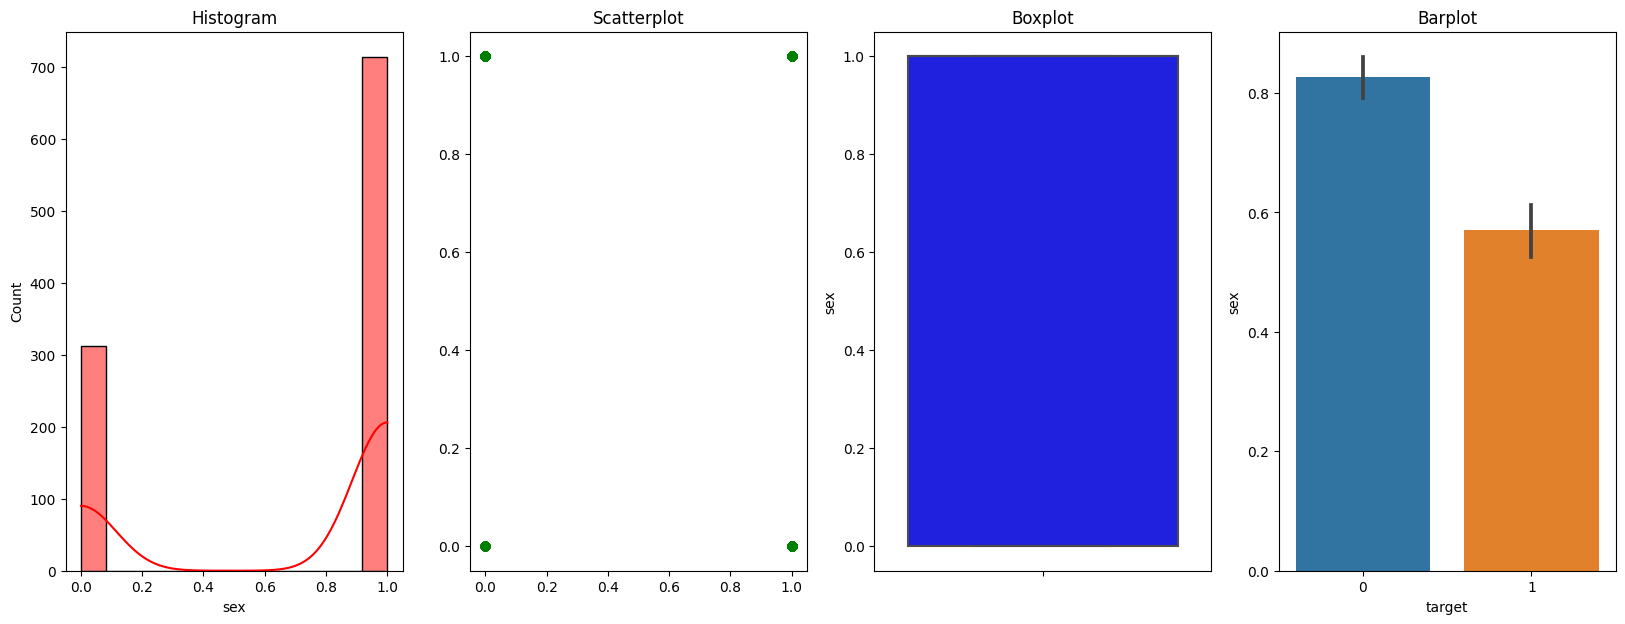

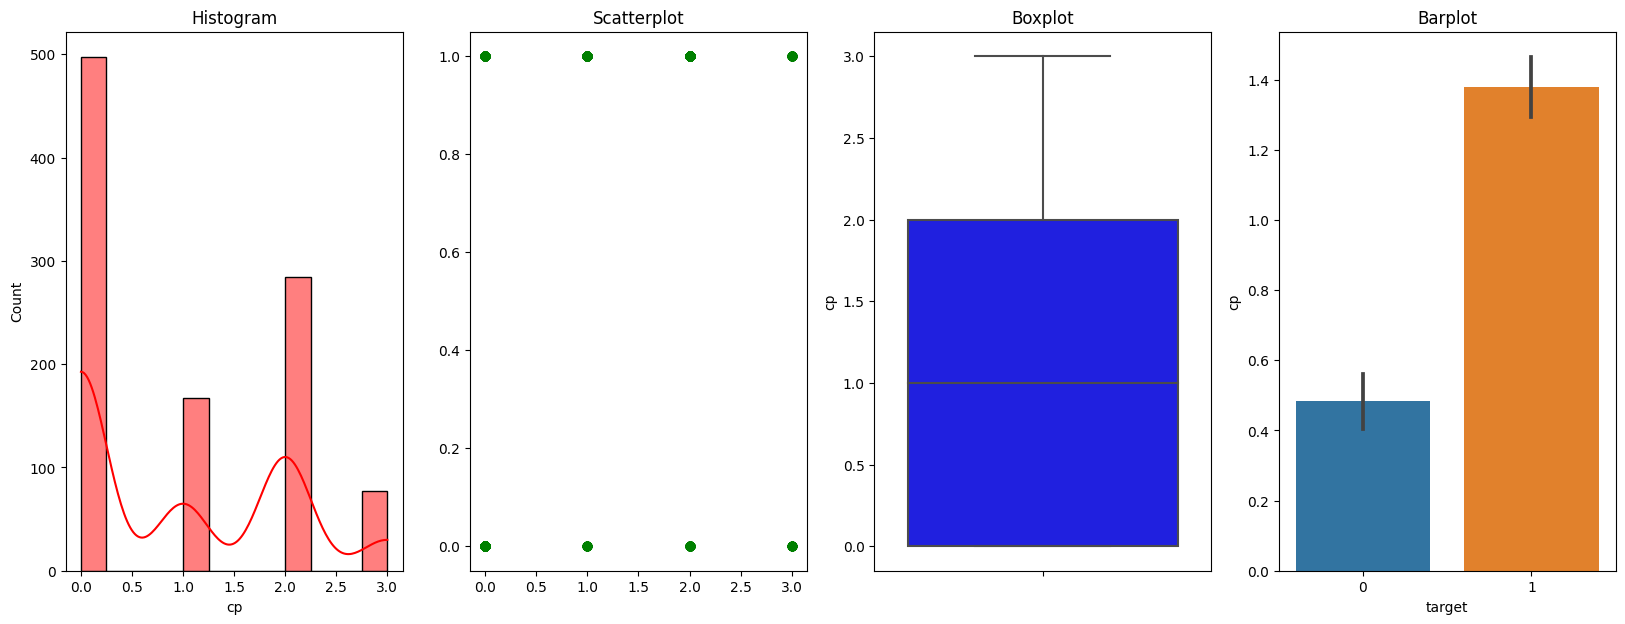

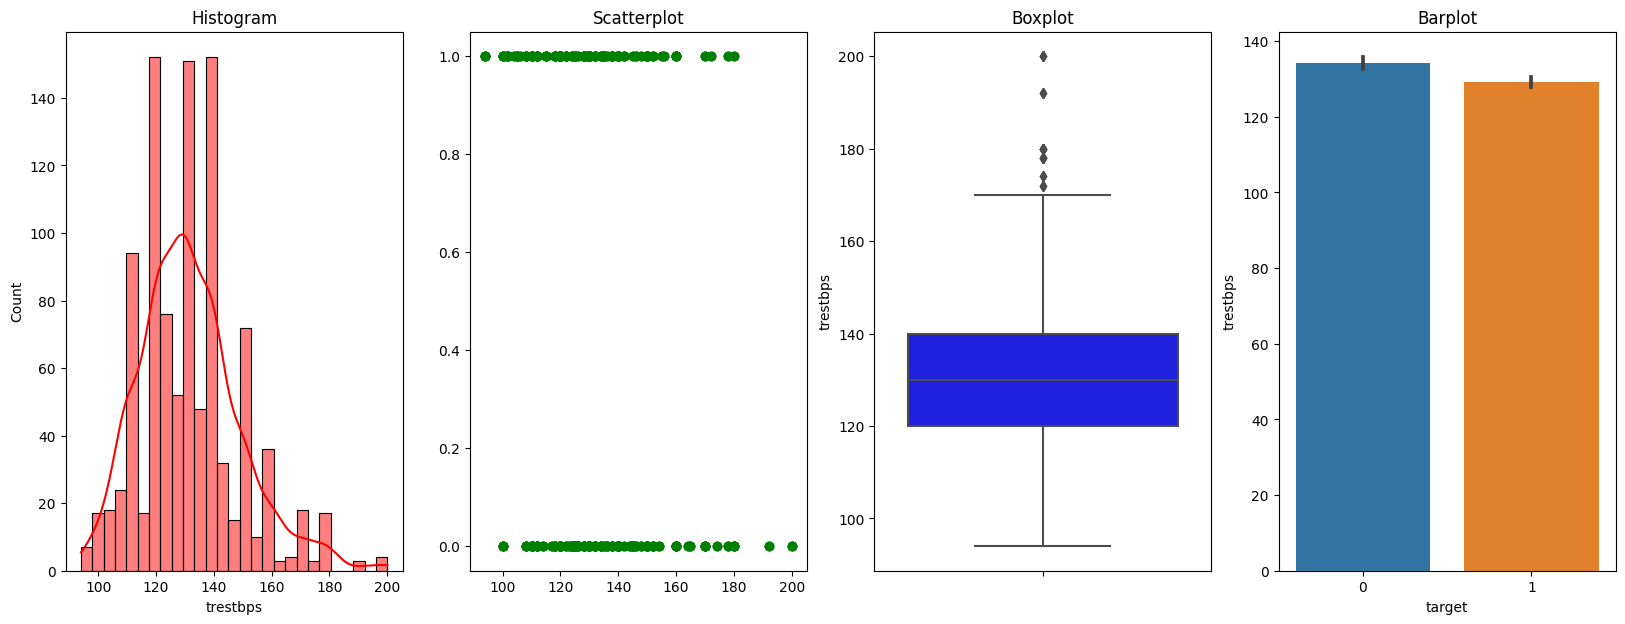

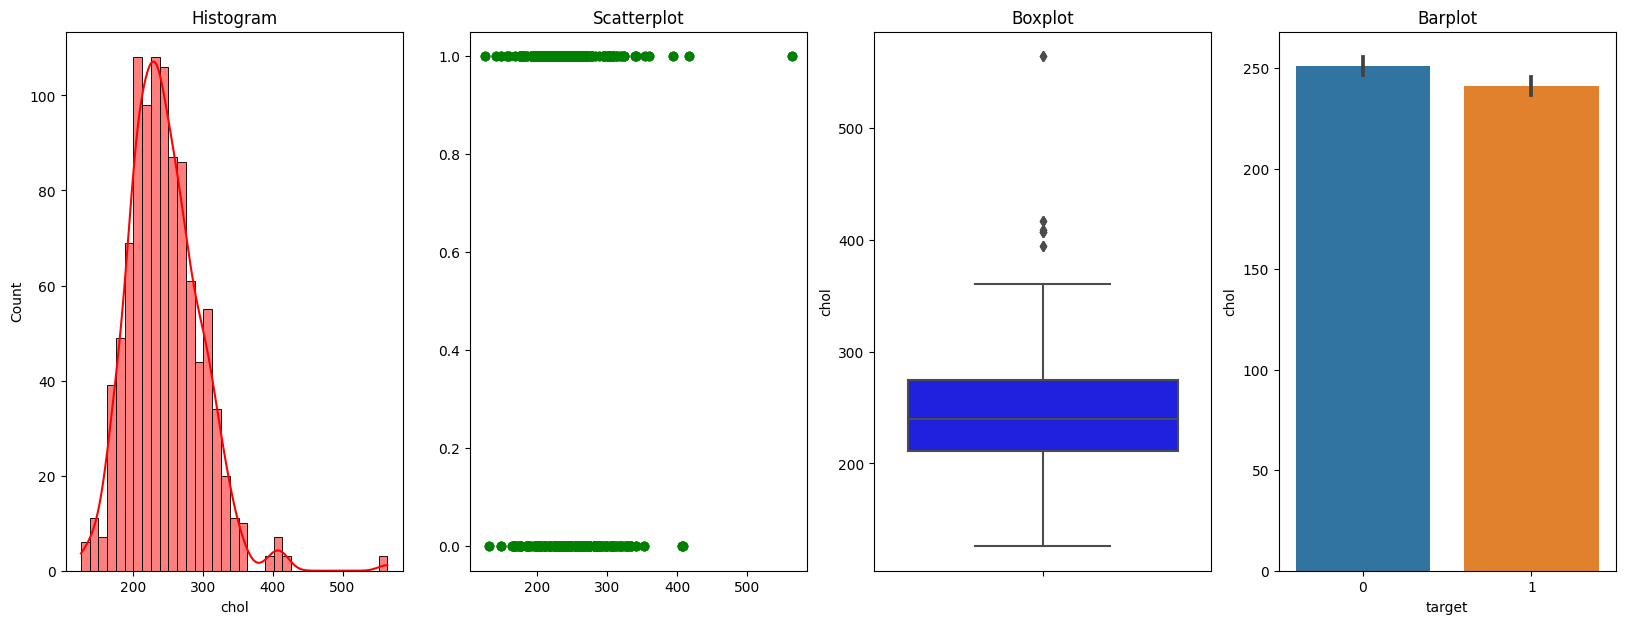

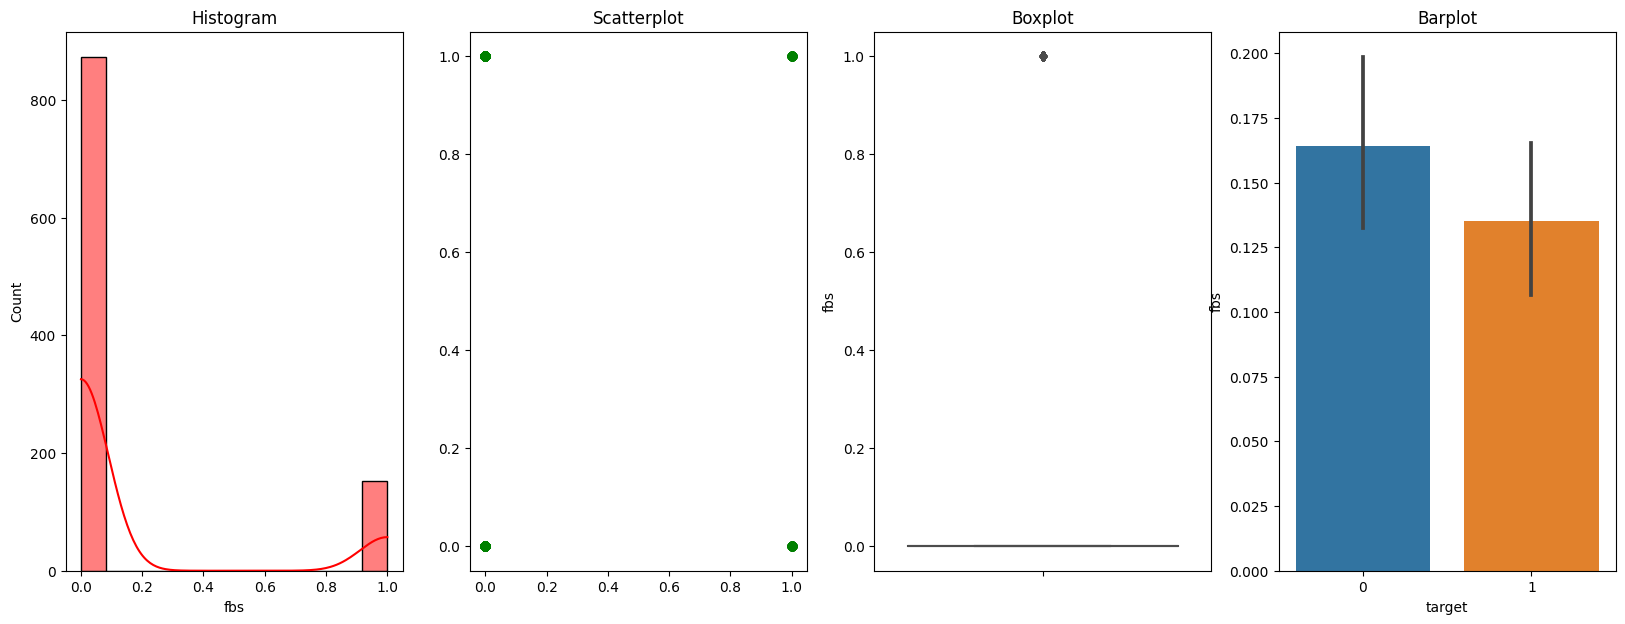

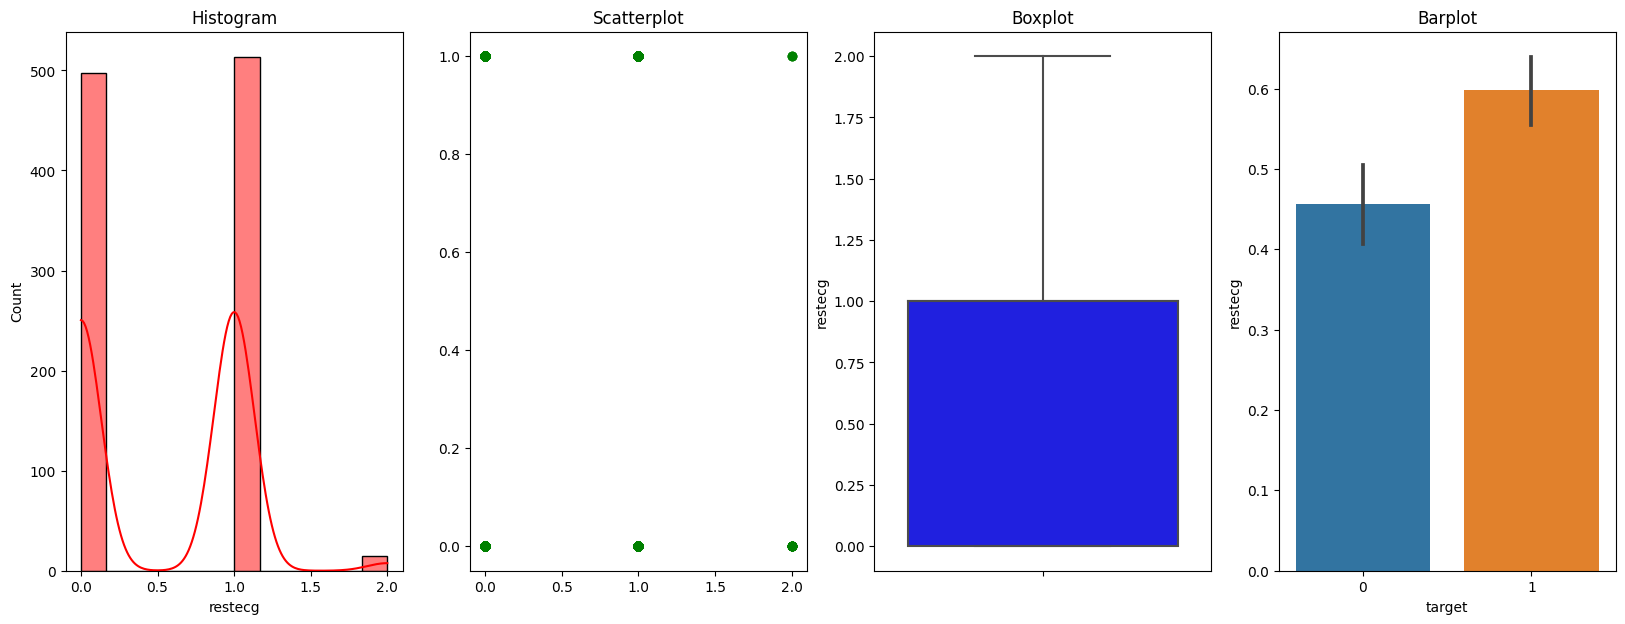

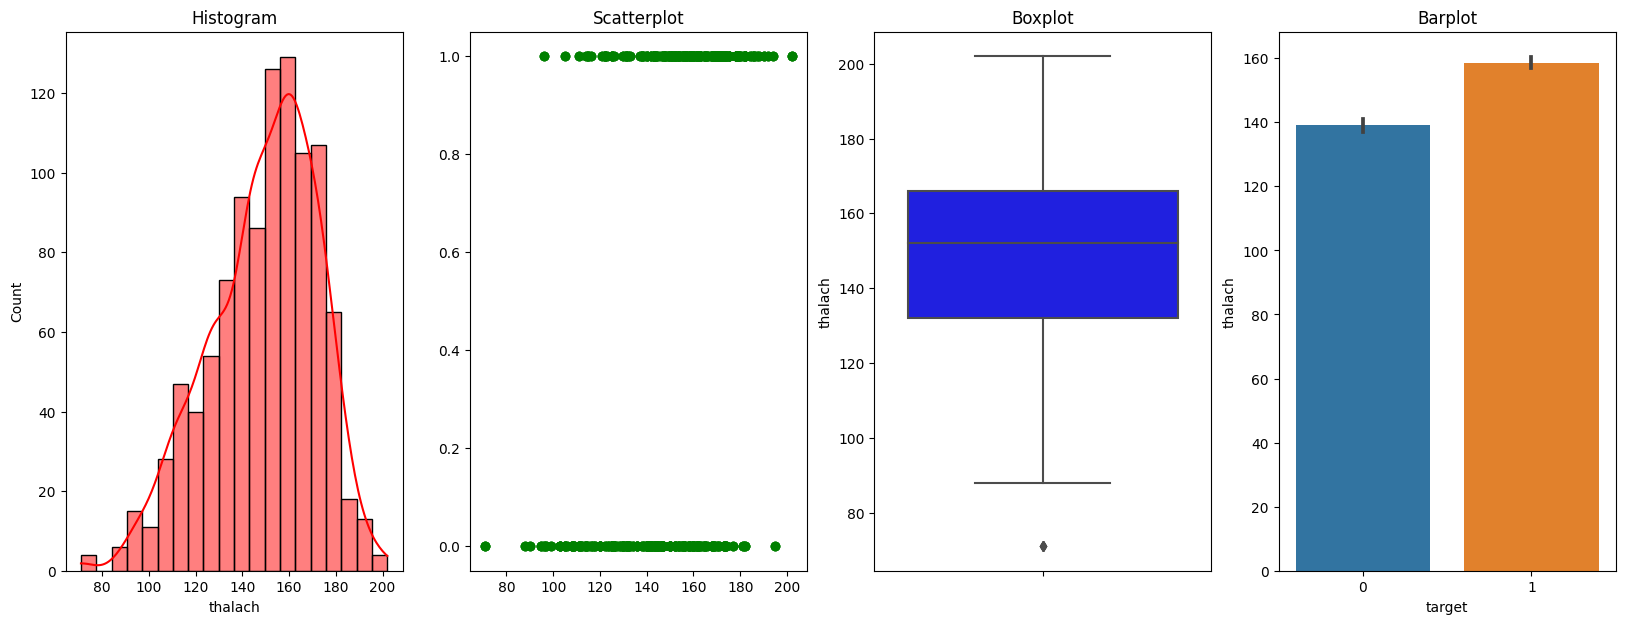

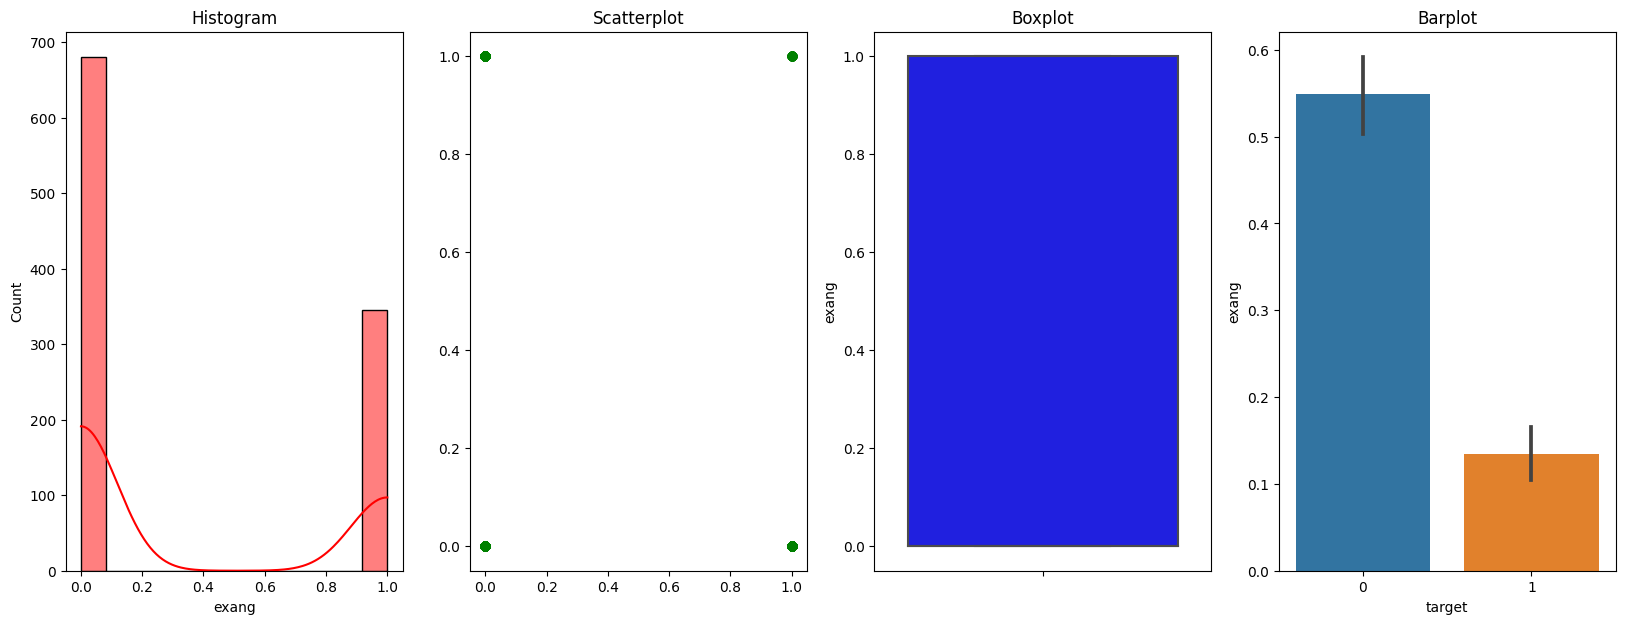

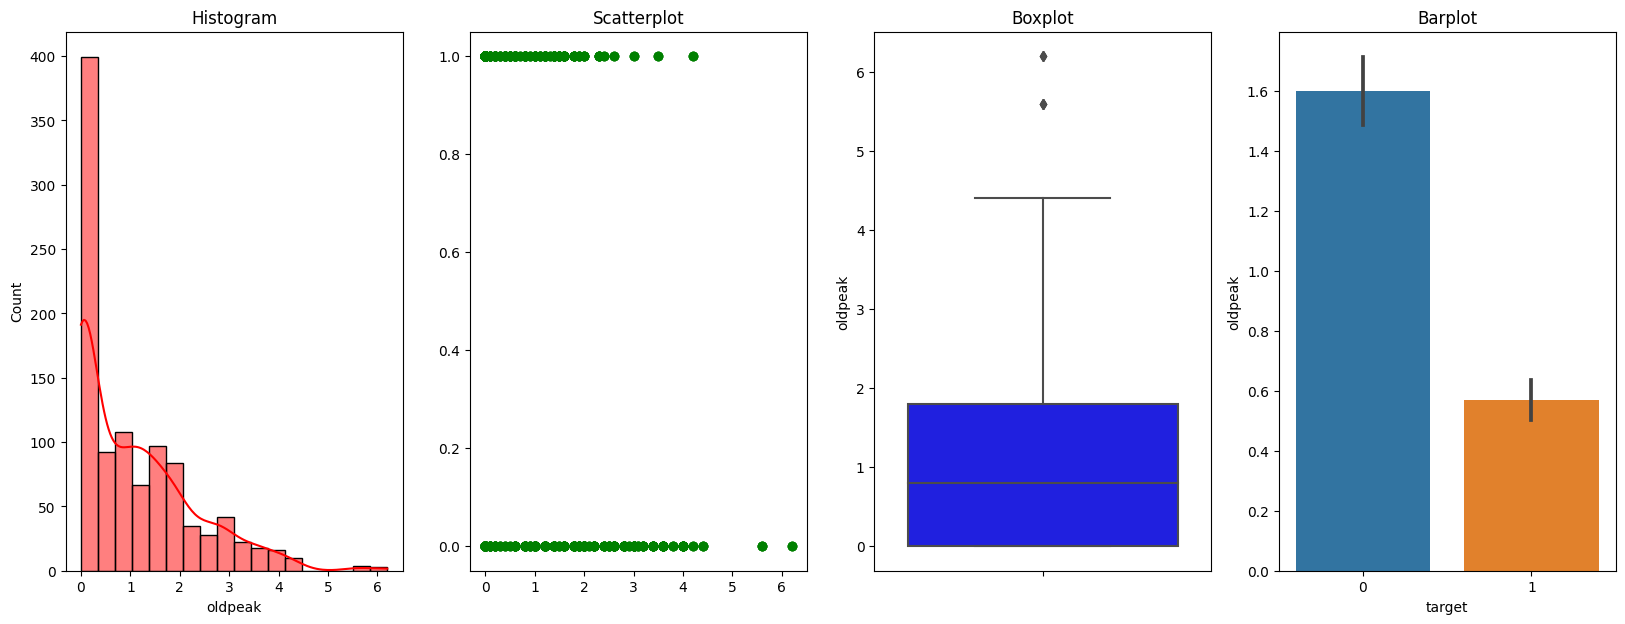

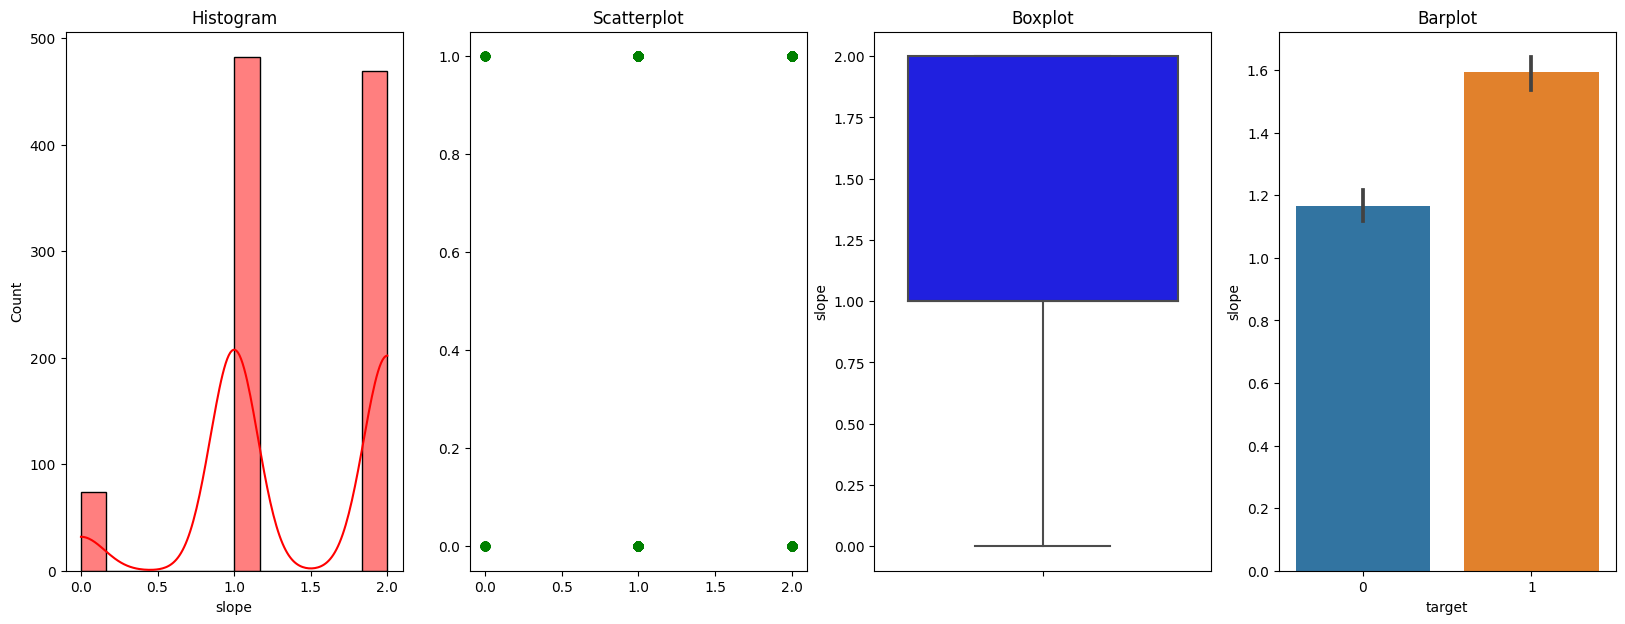

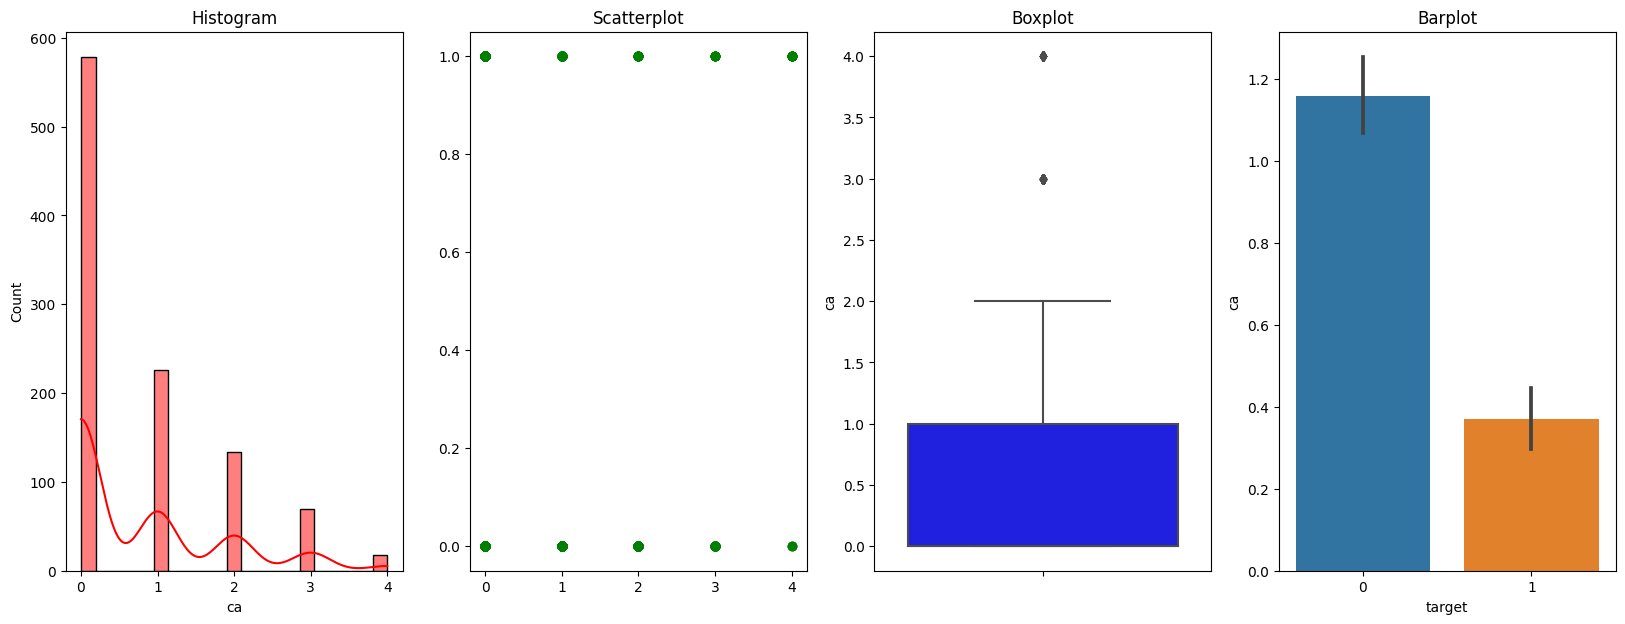

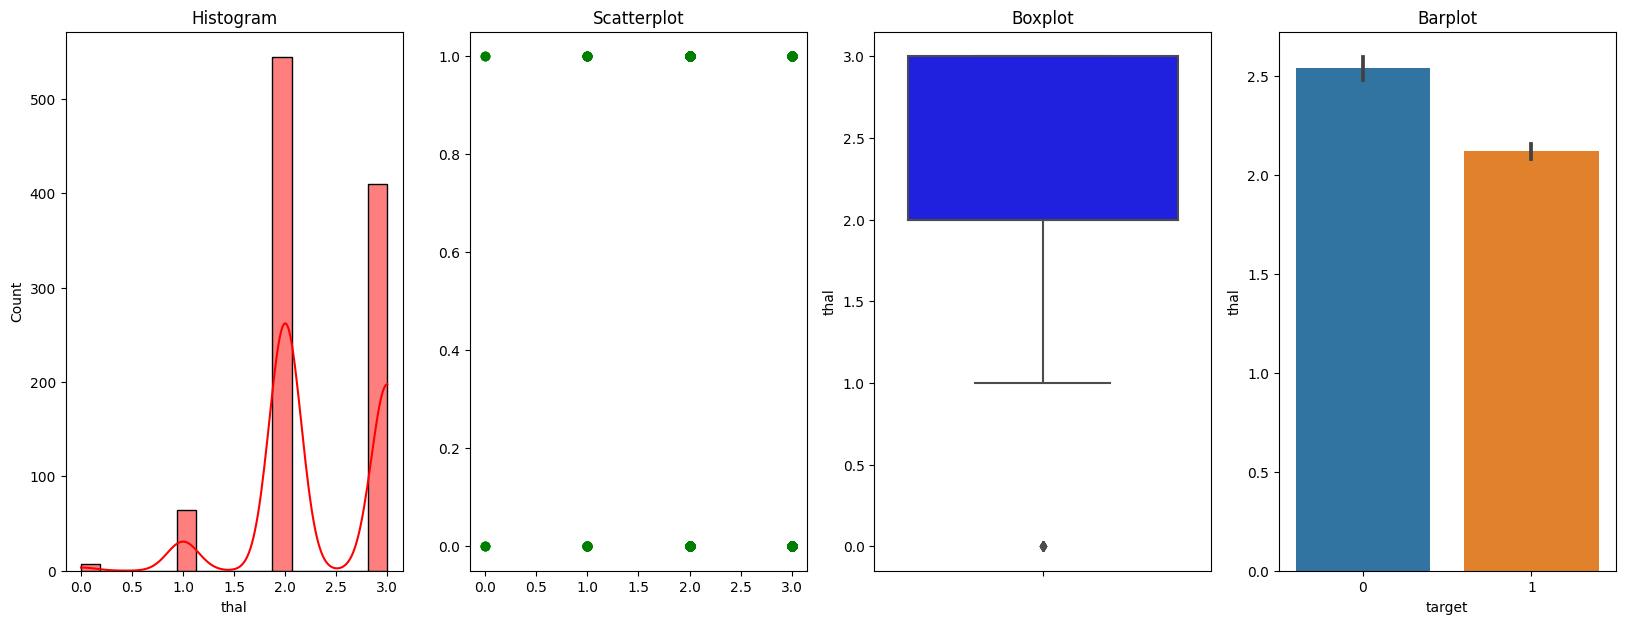

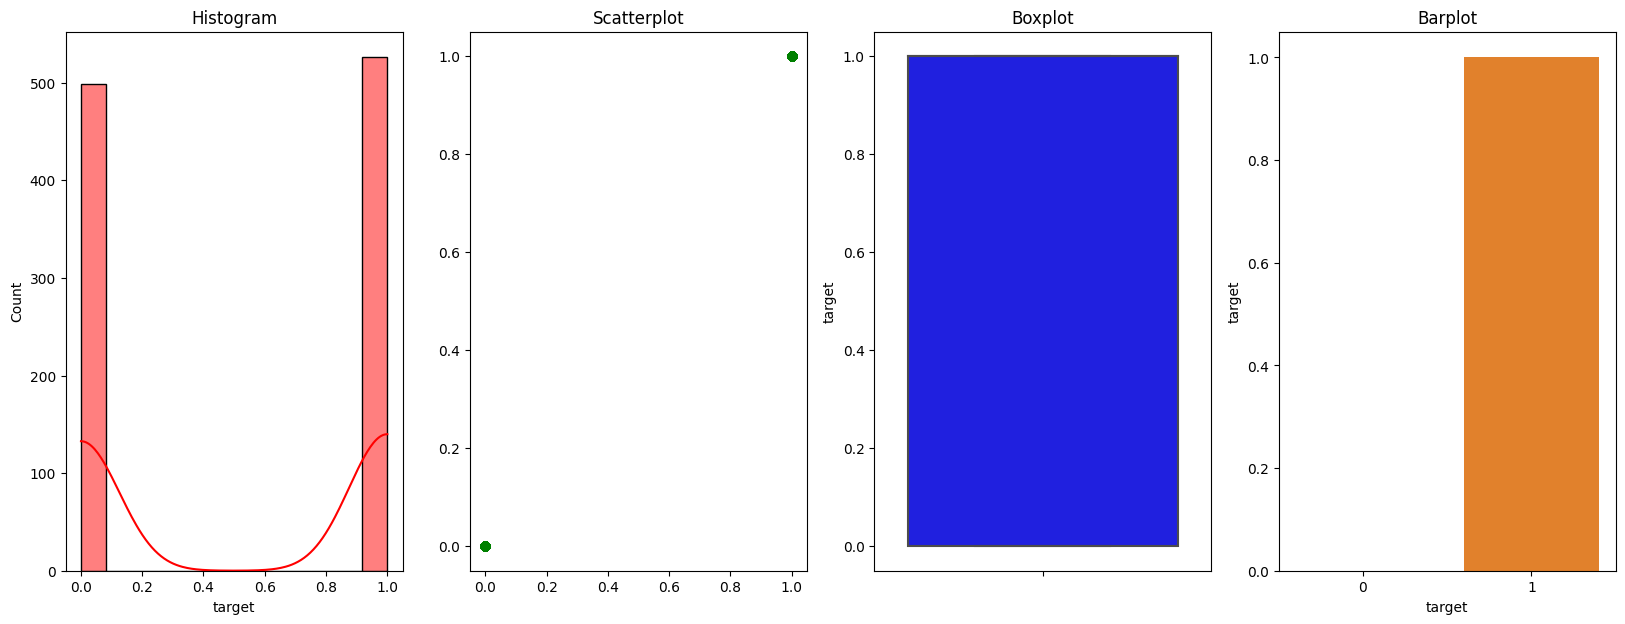

In [12]:
for col in df:
    diagnostic_plots(df,col,'target')

observation-after performing data preprocessing we come to a conclusion that data is cleaned and non duplicated.
            some outliers are observed in the process but does not make impact to the model. so we are going withe same data.

### modelling

In [13]:
### we are splitting the data  into two parts: labelled , unlabelled
from sklearn.model_selection import train_test_split
labeled_data, unlabeled_data = train_test_split(df, train_size=0.15, random_state=42) # 15%-labelled data                                                                                      
labeled_data.shape, unlabeled_data.shape                                              # 85%-unlabelled data

((153, 14), (872, 14))

In [14]:
### splitting the labelled data to x and y
X=labeled_data.drop('target',axis=1)
y=labeled_data['target']

### randomly splitting labelled data into X_train, X_test, y_train, y_test
X_train_labelled, X_test_labelled, y_train_labelled, y_test_labelled = train_test_split(X,y, test_size=0.2,random_state=3)

### unlabelling the labelled data by removing the output feature
X_unlabeled = unlabeled_data.drop('target', axis=1)

#### self-training algorithm for semi-supervised learning using  pseudo labelling

In [15]:
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

    # Supervised learning
    model = LogisticRegression()
    model.fit(X_train_labelled, y_train_labelled)

    # Pseudo labelling   
    y_pseudo = model.predict(X_unlabeled)

    # Combination of datasets
    X_combined = np.concatenate([X_train_labelled, X_unlabeled])
    y_combined = np.concatenate([y_train_labelled, y_pseudo])

    # Retraining the model with combined datasets
    model.fit(X_combined, y_combined)

    # Predicting on test and trained data
    y_pred_test = model.predict(X_test_labelled)
    y_pred_train = model.predict(X_train_labelled)

    # Calculating accuracies
    train_accuracy=accuracy_score(y_train_labelled, y_pred_train)
    test_accuracy=accuracy_score(y_test_labelled, y_pred_test)

    print('Train Accuracies:', train_accuracy)
    print('Test Accuracies:', test_accuracy)

    #classification report
    from sklearn.metrics import classification_report
    report = classification_report(y_test_labelled, y_pred_test)
    print(report)


Train Accuracies: 0.819672131147541
Test Accuracies: 0.8064516129032258
              precision    recall  f1-score   support

           0       0.91      0.67      0.77        15
           1       0.75      0.94      0.83        16

    accuracy                           0.81        31
   macro avg       0.83      0.80      0.80        31
weighted avg       0.83      0.81      0.80        31



we can clearly notice that the model works well with Logistic Regression (Base model) 

##### Roc for Base model

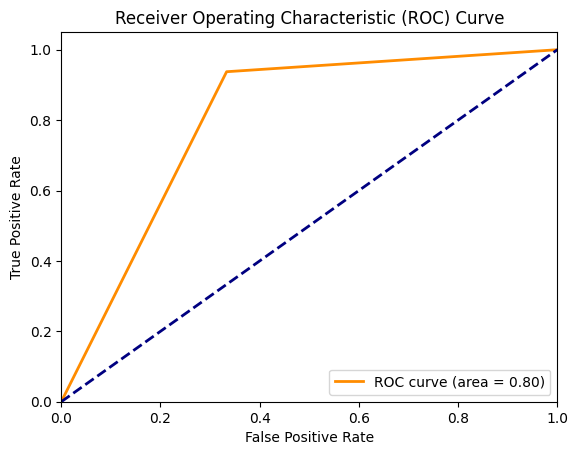

In [17]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test_labelled, y_pred_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### hypertuning

In [22]:

from sklearn.model_selection import GridSearchCV
model = LogisticRegression()

# Define the hyperparameter grid to search through
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100,150,200],     # Inverse of regularization strength (smaller values specify stronger regularization)
    'penalty': ['l1', 'l2'],          # Regularization penalty: l1 (Lasso) or l2 (Ridge)
    'solver': ['liblinear','saga','newton-cg','lbfgs']           # Solver algorithm for optimization (works well with small datasets)
}

# Initialize the GridSearchCV with the logistic regression model and hyperparameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1)

# Perform the grid search to find the best hyperparameters using labeled data only
grid_search.fit(X_train_labelled, y_train_labelled)

# Get the best model with the optimal hyperparameters
best_model = grid_search.best_estimator_

# Supervised learning using the labeled data
best_model.fit(X_train_labelled, y_train_labelled)

# Pseudo-labeling on the unlabeled data
y_pseudo = best_model.predict(X_unlabeled)

# Combine labeled and pseudo-labeled data
X_combined = np.concatenate([X_train_labelled, X_unlabeled])
y_combined = np.concatenate([y_train_labelled, y_pseudo])

# Train the model with the combined datasets
best_model.fit(X_combined, y_combined)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_labelled)

# Calculate accuracy scores
train_accuracy = accuracy_score(y_combined, best_model.predict(X_combined))
test_accuracy = accuracy_score(y_test_labelled, y_pred)

# Print results
print("Best Hyperparameters:", grid_search.best_params_)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

report = classification_report(y_test_labelled, y_pred)
print(report)


Best Hyperparameters: {'C': 150, 'penalty': 'l2', 'solver': 'liblinear'}
Train Accuracy: 0.9788732394366197
Test Accuracy: 0.8709677419354839
              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.83      0.94      0.88        16

    accuracy                           0.87        31
   macro avg       0.88      0.87      0.87        31
weighted avg       0.88      0.87      0.87        31



#### Roc curve for best model 

<function matplotlib.pyplot.show(close=None, block=None)>

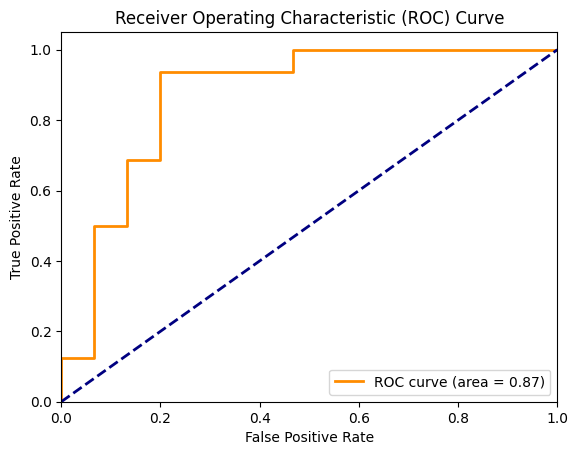

In [24]:
from sklearn.metrics import roc_curve, auc

# Getting the predicted probabilities for the positive class (class 1)
y_prob = best_model.predict_proba(X_test_labelled)[:, 1]

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_labelled, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show

### Conclusion

In the heart disease prediction dataset, semi-supervised learning is used which is a  specific type of machine learning approach where the dataset contains both labeled and unlabeled data.

we have access to a combination of labeled and unlabeled data.
The idea is to leverage the information from both types of data to improve the model's performance.
This is particularly useful when obtaining labeled data is costly, time-consuming, or challenging, but unlabeled data is more abundant and easier to collect.

With the help of self-training and psuedo labelling, semi supervised learning has been successfully implemented in our dataset

##### Results after semi supervised logistic regression base model
train accuracy-81%

test accuracy-80%

##### Results after hypertuning  semi supervised logistic regression model
train accuracy-97%

test accuracy-80%  (model is overfitting)

hence we conclude that the base model of semi supervised logistic regression can be a best fit for our dataset which can predict heart disease 
